In [133]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [134]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

# Morgan_fingerprint

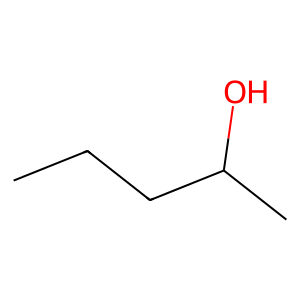

In [135]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

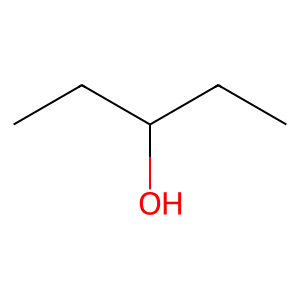

In [136]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [137]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X["molecule"] = TEST_X["SMILE"].apply(lambda x: Chem.MolFromSmiles(x))
TEST_X["morgan_fp"] = TEST_X["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
TEST_X

,SMILE,molecule,morgan_fp
0,CCCC(C)O,<rdkit.Chem.rdchem.Mol object at 0x0000018FFD5...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CCC(CC)O,<rdkit.Chem.rdchem.Mol object at 0x0000018FFD5...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [138]:
#rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True)

In [139]:
def SmileToMorganFP_df(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_array = np.array(morgan_fp)
    morgan_dataframe = pd.DataFrame(morgan_array)
    morgan_dataframe_row = morgan_dataframe.T
    return morgan_dataframe_row
def SmileToMorganFP(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_bit = morgan_fp.GetOnBits()
    morgan_array = np.array(morgan_fp)
    return morgan_array,tuple(morgan_bit)

In [140]:
# STEP 0 
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [141]:
# STEP 1
fp1 = SmileToMorganFP(name1)
fp2 = SmileToMorganFP(name2)

In [142]:
# STEP 2
# Find Diff Feature

fp_bit1=fp1[1]
fp_bit2=fp2[1]
all_diff = set(fp_bit1).symmetric_difference(set(fp_bit2))
diff2_from1 = set(fp_bit1)-set(fp_bit2)
diff1_from2 = set(fp_bit2)-set(fp_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [42, 47, 144, 193, 243]
M2 Diff from M1: 
 [47, 144, 243]
M1 Diff from M2: 
 [42, 193]


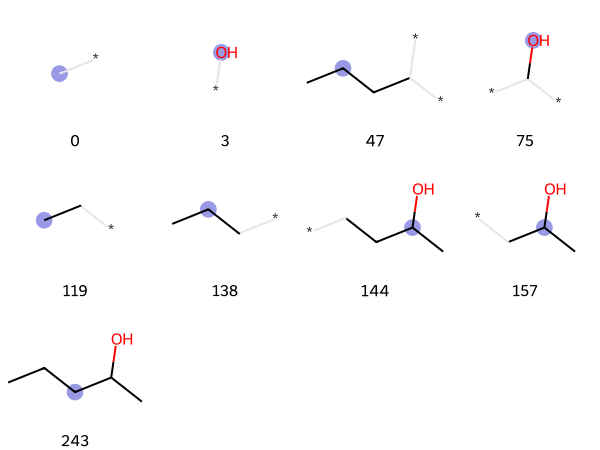

In [143]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

In [144]:
all_fragments

[(<rdkit.Chem.rdchem.Mol at 0x18ffd50e7a0>,
  0,
  {0: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)),
   3: ((5, 0),),
   47: ((1, 2),),
   75: ((5, 1),),
   119: ((0, 1), (4, 1)),
   138: ((1, 1), (2, 1)),
   144: ((3, 2),),
   157: ((3, 1),),
   243: ((2, 2),)}),
 (<rdkit.Chem.rdchem.Mol at 0x18ffd50e7a0>,
  3,
  {0: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)),
   3: ((5, 0),),
   47: ((1, 2),),
   75: ((5, 1),),
   119: ((0, 1), (4, 1)),
   138: ((1, 1), (2, 1)),
   144: ((3, 2),),
   157: ((3, 1),),
   243: ((2, 2),)}),
 (<rdkit.Chem.rdchem.Mol at 0x18ffd50e7a0>,
  47,
  {0: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)),
   3: ((5, 0),),
   47: ((1, 2),),
   75: ((5, 1),),
   119: ((0, 1), (4, 1)),
   138: ((1, 1), (2, 1)),
   144: ((3, 2),),
   157: ((3, 1),),
   243: ((2, 2),)}),
 (<rdkit.Chem.rdchem.Mol at 0x18ffd50e7a0>,
  75,
  {0: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)),
   3: ((5, 0),),
   47: ((1, 2),),
   75: ((5, 1),),
   119: ((0, 1), (4, 1)),
   138: ((1, 1), (2, 1)),
   144: ((3, 

# 

In [145]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred



In [146]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data
X_data= df.drop(columns ={"Name","Tb","CAS","Type","Formular","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","C","Double", "Triple", "Bracket", "Cyclic"})
Y_data= df["Tb"]


In [147]:
X_data_use = X_data.copy()
X_data_use2 = X_data.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
#X_data_use

In [148]:
#X_data
X_data_fp = []
for i in range(X_data_use.shape[0]):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)

In [149]:
#X_data_fp
#Y_data

In [150]:
# %%
X_train, X_test, y_train, y_test = train_test_split(X_data_fp, Y_data,test_size=0.3,random_state=42)
########   Model  ########
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [151]:
X_data_use2 = X_data.copy()
X_data_use2["Bit"] = X_data_use["molecule"].apply(lambda x: np.array(rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True).GetOnBits()))
X_data_use2["Bit"] = X_data_use2["Bit"].apply(lambda x: ' '.join([str(elem) for elem in x]))
X_data_use2["len Bit"] = X_data_use2["Bit"].apply(lambda x: x.count(" ")+1)

In [152]:
#X_data_use2.to_csv("TEST2.csv")
#' ,'.join([str(elem) for elem in X_data_use2["Bit"]])
#' '.join(X_data_use2["Bit"][:])
#X_data_use2["Bit"][1]

In [153]:
X_data_use2

,SMILES,Bit,len Bit
0,C,0,1
1,CC,0 119,2
2,CCC,0 119 138,3
3,C1CC1,0 138 196,3
4,CC(C)C,0 119 138,3
...,...,...,...
555,CCCCCCC#CCCC,0 11 19 24 30 47 62 63 64 91 98 119 138 164 16...,18
556,CCCCCCCCCC,0 24 47 63 102 117 119 138 196,9
557,CCCCCCCCC#CC,0 11 19 24 30 47 63 91 98 102 117 119 138 163 ...,18
558,CCCCCCCC1CCCC1,0 2 24 47 59 63 102 103 111 119 138 154 160 18...,17


In [178]:
X_data_use3 = X_data.copy()
X_data_use3["Bit"] = X_data_use["molecule"].apply(lambda x: np.array(rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=2**10, useFeatures=True, useChirality=True).GetOnBits()))
unique_bit = []
X_data_use3["Bit"] = X_data_use3["Bit"].apply(lambda x: ' '.join([str(elem) for elem in x]))
bit = X_data_use3["Bit"].apply(lambda x: x.split(" "))
lst1 = list(enumerate(bit))[:][0][1]

for i in range(560):
    lst2 = list(enumerate(bit))[:][i][1]
    lst1 = list(set(lst1) | set(lst2))

lst1 = sorted([eval(i) for i in lst1], reverse = True)
len(lst1)

571